In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose 
import statsmodels.api as sm
import seaborn as sns 
import statsmodels

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [3]:
df = pd.read_csv(r'Bond-VN.csv', index_col= 0,parse_dates=True)
df = df[['GGVF5Y','GGVF1Y','GGVF3Y','CPI','FER','Baserate','FIR','Stockreturn','Fiscal','Pubdebt','CurrentAcc']]


In [4]:
nobs = int(len(df)*0.2)
df_train, df_test = df[0:-nobs], df[-nobs:]

In [5]:
df.describe()

,GGVF5Y,GGVF1Y,GGVF3Y,CPI,FER,Baserate,FIR,Stockreturn,Fiscal,Pubdebt,CurrentAcc
count,162.000000,162.000000,162.000000,162.000000,1.620000e+02,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,0.080716,0.071499,0.076911,0.601198,3.113248e+10,8.885802,1.479954,0.764756,-2.879439,50.436752,-0.392593
std,0.033162,0.036271,0.034570,0.793960,1.633594e+10,1.085656,1.826785,8.797782,1.856116,6.870214,5.182574
min,0.020000,0.015500,0.018380,-0.756000,1.246660e+10,7.000000,0.310000,-24.009196,-5.027260,38.406899,-11.000000
25%,0.054277,0.043233,0.049960,0.131250,1.644710e+10,8.500000,0.375000,-3.245701,-4.260530,45.166601,-3.800000
50%,0.080000,0.067000,0.076030,0.404500,2.589349e+10,9.000000,0.500000,0.774177,-3.481840,51.674497,2.100000
75%,0.100880,0.092365,0.097433,0.831250,3.652729e+10,9.000000,2.000000,4.193213,-0.897920,57.097769,2.900000
max,0.203330,0.211670,0.206670,3.912000,6.881210e+10,14.000000,9.000000,38.517100,1.224610,59.662135,6.000000


# Linear Regression (OLS)

In [6]:
y_train = df_train.GGVF1Y
x_train = df_train[['GGVF5Y','CPI','FER','Baserate','FIR','Stockreturn','Fiscal','Pubdebt','CurrentAcc']]

y_test = df_test.GGVF1Y
x_test = df_test[['GGVF5Y','CPI','FER','Baserate','FIR','Stockreturn','Fiscal','Pubdebt','CurrentAcc']]

index_test = y_test.index

In [7]:
x_train,y_train = np.array(x_train), np.array(y_train)
x_train = sm.add_constant(x_train)


In [8]:
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = sm.add_constant(x_test,has_constant='add')

In [9]:
linear_regression_model = sm.OLS(y_train,x_train).fit()
print(linear_regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     639.5
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           6.16e-97
Time:                        15:11:27   Log-Likelihood:                 508.68
No. Observations:                 130   AIC:                            -997.4
Df Residuals:                     120   BIC:                            -968.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0107      0.009     -1.204      0.2

***=> CPI, Oilrate, Stockreturn, Fiscal và CurrentAcc không có ý nghĩa thống kê. Tuy nhiên ta không thể loại bỏ các biến này được. Ta cần kiểm tra sự phụ thuộc của chúng vào các biến độc lập khác.***

# Đa cộng tuyến

In [10]:
corr = df[['GGVF1Y','GGVF5Y','CPI','FER','Baserate','FIR','Stockreturn','Fiscal','Pubdebt','CurrentAcc']].corr()
print('Pearson correlation coefficient matrix of each variables:\n')
corr_table = pd.DataFrame(round(corr,2))
corr_table

Pearson correlation coefficient matrix of each variables:



,GGVF1Y,GGVF5Y,CPI,FER,Baserate,FIR,Stockreturn,Fiscal,Pubdebt,CurrentAcc
GGVF1Y,1.00,0.99,0.41,-0.71,0.36,0.05,-0.08,0.60,-0.72,-0.48
GGVF5Y,0.99,1.00,0.40,-0.77,0.32,-0.00,-0.07,0.55,-0.71,-0.44
CPI,0.41,0.40,1.00,-0.28,0.09,0.21,-0.15,0.43,-0.42,-0.36
FER,-0.71,-0.77,-0.28,1.00,0.16,0.04,0.00,-0.47,0.70,0.41
Baserate,0.36,0.32,0.09,0.16,1.00,0.12,-0.16,0.24,-0.02,-0.05
FIR,0.05,-0.00,0.21,0.04,0.12,1.00,0.02,0.59,-0.51,-0.52
Stockreturn,-0.08,-0.07,-0.15,0.00,-0.16,0.02,1.00,-0.13,0.06,0.11
Fiscal,0.60,0.55,0.43,-0.47,0.24,0.59,-0.13,1.00,-0.80,-0.62
Pubdebt,-0.72,-0.71,-0.42,0.70,-0.02,-0.51,0.06,-0.80,1.00,0.70
CurrentAcc,-0.48,-0.44,-0.36,0.41,-0.05,-0.52,0.11,-0.62,0.70,1.00


In [11]:
corr_table.to_excel('OLS_1y.xlsx')

<ipython-input-12-65927551eb8b>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


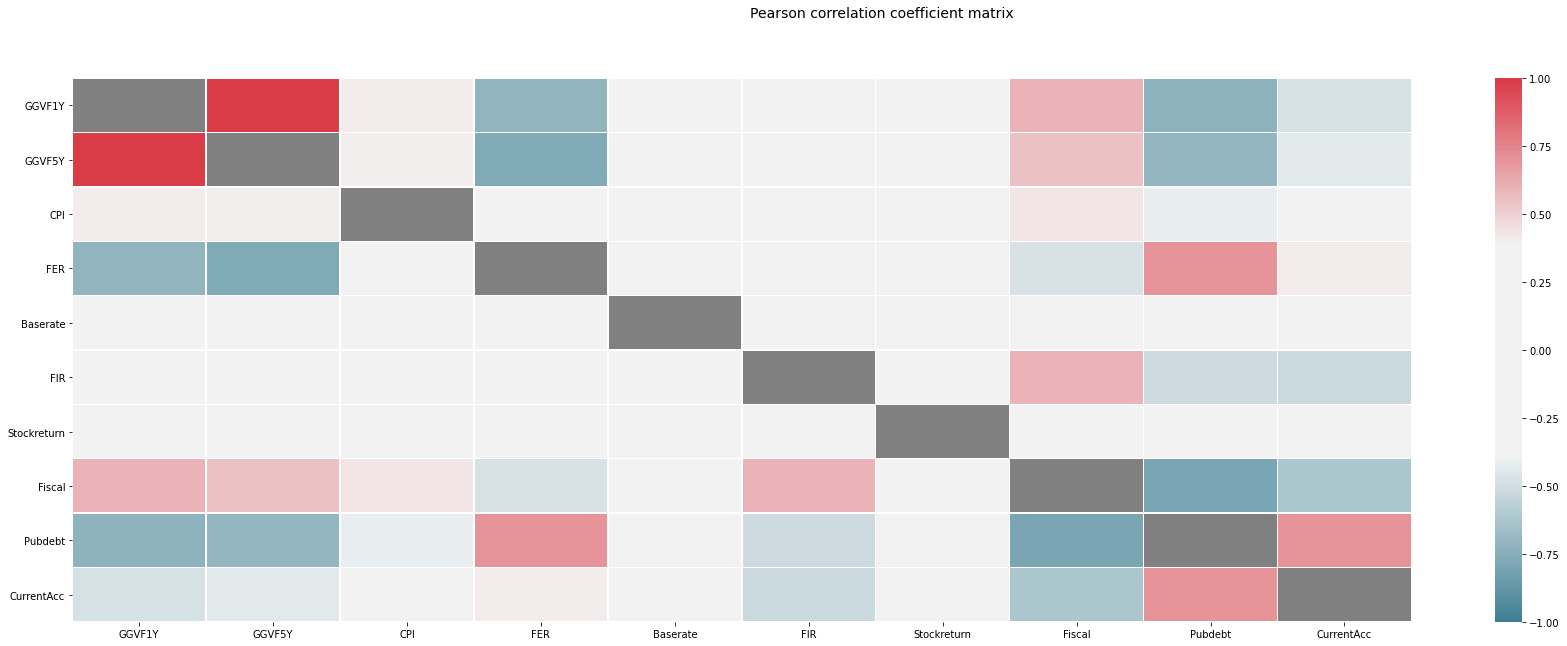

In [12]:
# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(30, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)


# Tự tương quan

In [13]:
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(linear_regression_model.resid)

print('Durbin-Watson:', durbinWatson,'\n')
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 0.4736739324964085 

Signs of positive autocorrelation 

Assumption not satisfied


# Kiểm định Ramsey

In [14]:
# Kiểm định Ramsey
ramsey_test = statsmodels.stats.diagnostic.linear_reset(linear_regression_model, power=2, test_type='fitted')
print(f'P-value of Ramsey test: {ramsey_test.pvalue}')

if ramsey_test.pvalue < 0.1:
    print('Vậy với α = 0,1 và P-value < 0.1, mô hình gốc không có sự thiếu biến.')
else:
    print('Vậy với α = 0,1 và P-value > 0.1, mô hình gốc có sự thiếu biến.')

P-value of Ramsey test: 0.33889125813060095
Vậy với α = 0,1 và P-value > 0.1, mô hình gốc có sự thiếu biến.


***Trực quan hóa***

In [15]:
prediction_result = linear_regression_model.predict(x_test)

In [16]:
table_1 = pd.DataFrame({'Real': y_test,
                        'Prediction':prediction_result},index= index_test)

In [17]:
table_1.head(10)


,Real,Prediction
Time,,
2017-05-01,0.03800,0.038565
2017-06-01,0.03700,0.036674
2017-07-01,0.03360,0.033451
2017-08-01,0.04110,0.035560
2017-09-01,0.04000,0.032908
2017-10-01,0.03840,0.032067
2017-11-01,0.04054,0.033058
2017-12-01,0.03640,0.029458
2018-01-01,0.02902,0.020272


In [18]:
table_1.to_excel('OLS_result_1y.xlsx')

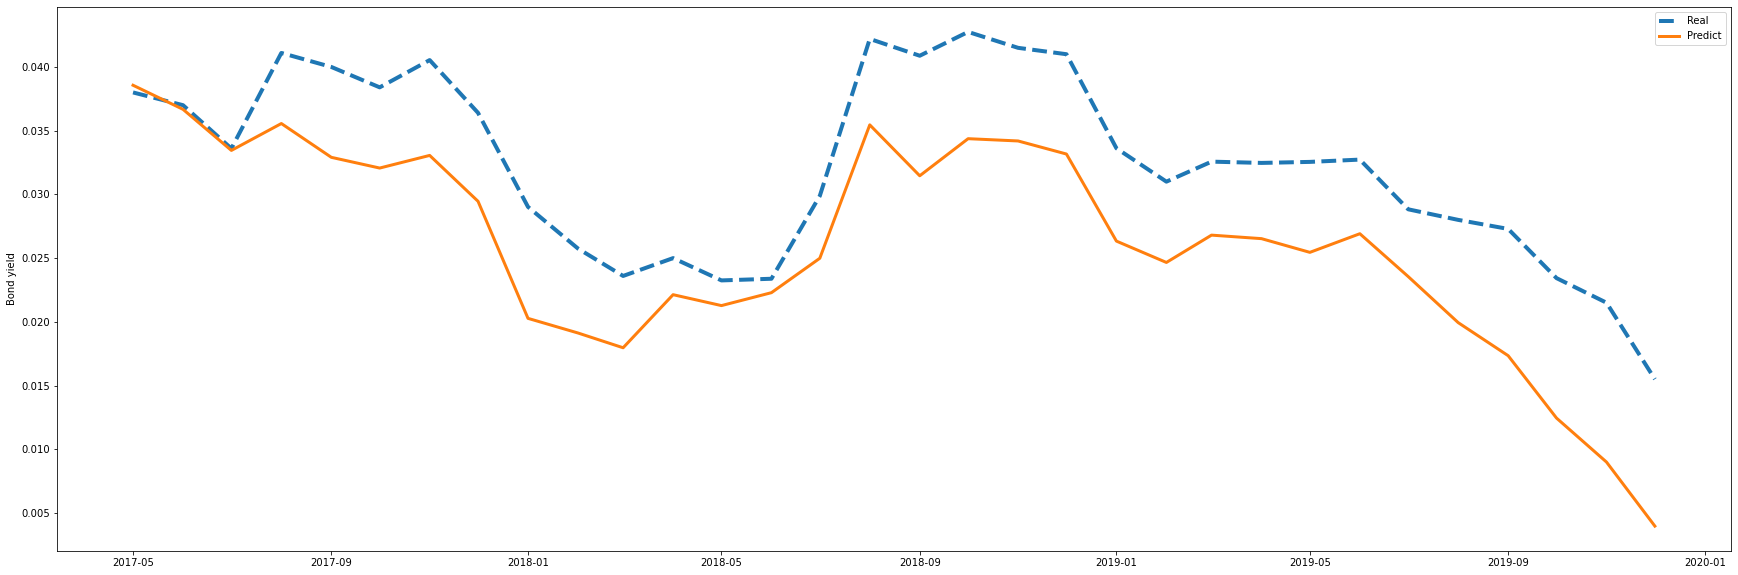

In [19]:
plt.figure(figsize=(30,10))

plt.plot(table_1.Real,'--',linewidth= 4)
plt.plot(table_1.Prediction,linewidth= 3)

plt.legend(['Real','Predict'])

plt.ylabel('Bond yield')
plt.show()

In [20]:
rmse = np.sqrt(mean_squared_error(table_1.Real, table_1.Prediction))
mae = mean_absolute_error(table_1.Real, table_1.Prediction)
mape = (mean_absolute_percentage_error(table_1.Real, table_1.Prediction))*100

In [21]:
print(f'RMSE = {rmse}')
print(f'MAE  = {mae}')
print(f'MAPE = {round(mape,2)}%')


RMSE = 0.007031219358861967
MAE  = 0.006328144020434618
MAPE = 21.4%
